### Importaciones

In [3]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from datetime import datetime

Definir folder de datos y crear dataset con pandas

In [7]:
data_folder = os.path.join(os.getcwd(), 'datos_ventas')

data = pd.read_csv(os.path.join(data_folder, 'datos_ventas.csv'))

data.head()

,ID_Venta,Producto,Ciudad,Categoria,Precio_Unitario,Cantidad,Fecha_Venta,Cliente,Email,Telefono,Direccion,Metodo_Pago,Estado,Comentario,Descuento
0,28,owner,East Jonathan,TV,2400,22,.2023-11-20,Daniel Garcia,edward94?example.org,001-419-330-3873x87349?,USS Fuller\nFPO AA 30334,Efectivo,Entregado,_Producto defectuoso,21
1,20,education,Trujillofort,spring,600,18,2023-01-04,Larry Welch,powersjimmy@example.org.,(175)317-5834,"03346 Tony Spring Apt. 633\nEricberg, AK 73272",_Efectivo,Entregado,Producto defectuoso,87
2,25,strategy,Nguyenshire,group,900,28,2023-05-05,Kelsey Lopez,estesjon@example.org,857-262-8794,"_493 Cameron Ramp\nVeronicatown, MI 81010",Efectivo,En!camino,Producto defectuoso,12
3,9,present,South Thomas,budget,700,27,2023-06-28*,Sharon Lowe,estesjon@example.org,?001-594-337-5421x87814,29882 Stein Tunnel Apt. 468\nPort Jacquelinevi...,Efectivo,Entregado,Producto defectuoso,28
4,9,song,New Reginaldmouth,at,200,29,2023-07-08.,Alan Bird,edward94@example.org,001-236-332-5014x39284,"30768 Louis Mill\nLake Carmen, LA 47934*",_Tarjeta,Entregado,Producto defectuoso,14


In [8]:
data.shape

(18000, 15)

Función para determinar patrón

In [11]:
def determinar_patron(cadena):
    
    patron = []
    
    for caracter in cadena:
        if caracter.isdigit():
            patron.append(r"\d")
        elif caracter.isalpha():
            patron.append(r"[a-zA-Z]")
        elif caracter.isspace():
            patron.append(r"\s")
        elif caracter in ['.', ',', '!', '?', '-', '_','¿','¡']:
            patron.append(re.escape(caracter))
        else:
            patron.append(re.escape(caracter))
            
        if len(patron) >= 2 and patron[-1] == patron[-2]:
            patron.pop()
            
    patron = "".join(patron)
    
    return patron
        

In [22]:
# probando funcion detectora de Regex
print(determinar_patron("!andrewgonzlez@gmail.com*"))
print(determinar_patron("andrewgonzlez@yahoo.com"))
print(determinar_patron("fula@gmail.com"))
print(determinar_patron("!andrewgonzlez@gmail.com*"))

![a-zA-Z]@[a-zA-Z]\.[a-zA-Z]\*
[a-zA-Z]@[a-zA-Z]\.[a-zA-Z]
[a-zA-Z]@[a-zA-Z]\.[a-zA-Z]
![a-zA-Z]@[a-zA-Z]\.[a-zA-Z]\*


In [32]:
df = data.copy()

# Correción de Email

In [24]:
def limpiar_correo(correo):
    usuario_permitidos = r"[^a-zA-Z0-9._%+-]"
    dominio_permitidos = r"[^a-zA-Z0-9.-]"
    
    partes = correo.split("@")
    if len(partes) != 2:
        return correo
    
    usuario, dominio = partes
    
    usuario_limpio = re.sub(usuario_permitidos, "", usuario)
    
    dominio_limpio = re.sub(dominio_permitidos, "", dominio)
    
    if '.' not in dominio_limpio:
        return correo
    
    correo_limpio = f"{usuario_limpio}@{dominio_limpio}"
    
    return correo_limpio

In [46]:
def corregir_arroba(correo):
    correo = limpiar_correo(correo)

    wrong_domains = ['?example.', '!example.', '*example.']

    if any(domain in correo for domain in wrong_domains):
        correo = re.sub(r'[?!.*]\s*example\.', '@example.', correo)

    if re.search(r'[a-zA-Z]example.', correo):
        correo = re.sub(r'example.', '@example.', correo)

    if re.search(r'\dexample.', correo):
        correo = re.sub(r'example.', '@example.', correo)
    
    if re.search(r'\s+example.', correo):
        correo = re.sub(r'\s+example.', '@example.', correo)

    correo = re.sub(r'^[^\w]+|[^\w]+$', '', correo)
    correo = re.sub(r'^_+', '', correo)
    correo = re.sub(r'_+$', '', correo)
    
    return correo

In [28]:
def validar_email(email):
    email_regex = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(email_regex, email))

In [47]:
df['EmailValidation'] = df['Email'].apply(validar_email)

df[['Email', 'EmailValidation']].head()

,Email,EmailValidation
0,edward94@example.org,True
1,powersjimmy@example.org,True
2,estesjon@example.org,True
3,estesjon@example.org,True
4,edward94@example.org,True


In [36]:
df['EmailValidation'] = df['Email'].apply(validar_email)

In [48]:
df['Email'] = df['Email'].apply(corregir_arroba)
df['EmailValidation'] = df['Email'].apply(validar_email)

df[['Email', 'EmailValidation']].head()

,Email,EmailValidation
0,edward94@example.org,True
1,powersjimmy@example.org,True
2,estesjon@example.org,True
3,estesjon@example.org,True
4,edward94@example.org,True


In [49]:
df[['Email','EmailValidation']].groupby('EmailValidation').count()

,Email
EmailValidation,
True,18000


In [50]:
df['Email'][df['EmailValidation']==False]

Series([], Name: Email, dtype: object)

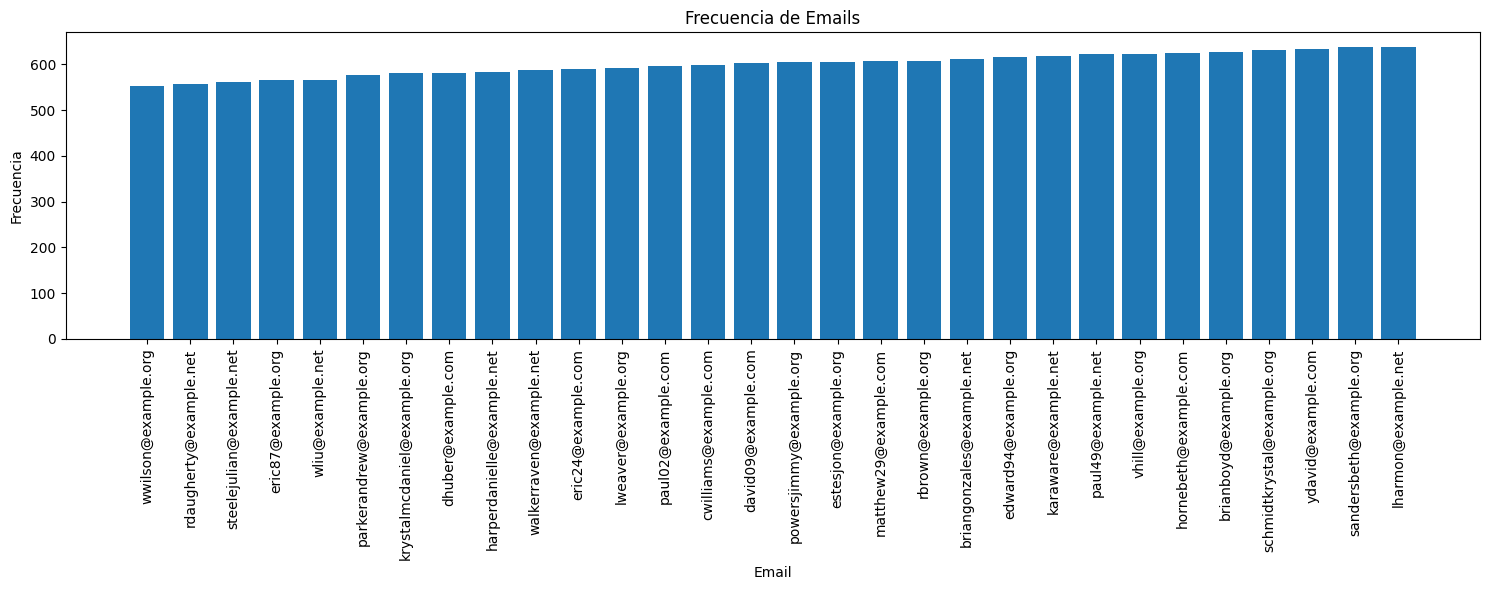

In [53]:
conteo = df['Email'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Email')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Emails')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección del Producto

In [55]:
def validate_string(cadena):
    if re.search(r'^[a-zA-Z0-9\s]+$', cadena):
        return True
    return False

In [57]:
def clean_string(cadena):
    cadena = re.sub(r'[^a-zA-Z0-9\s]+', '', cadena)
    cadena = re.sub(r'\s+', ' ', cadena)
    cadena = cadena.strip()
    return cadena

In [58]:
df['Producto'] = df['Producto'].apply(clean_string)
df['ProductoValidation'] = df['Producto'].apply(validate_string)

df[['Producto', 'ProductoValidation']].groupby('ProductoValidation').count()

,Producto
ProductoValidation,
True,18000


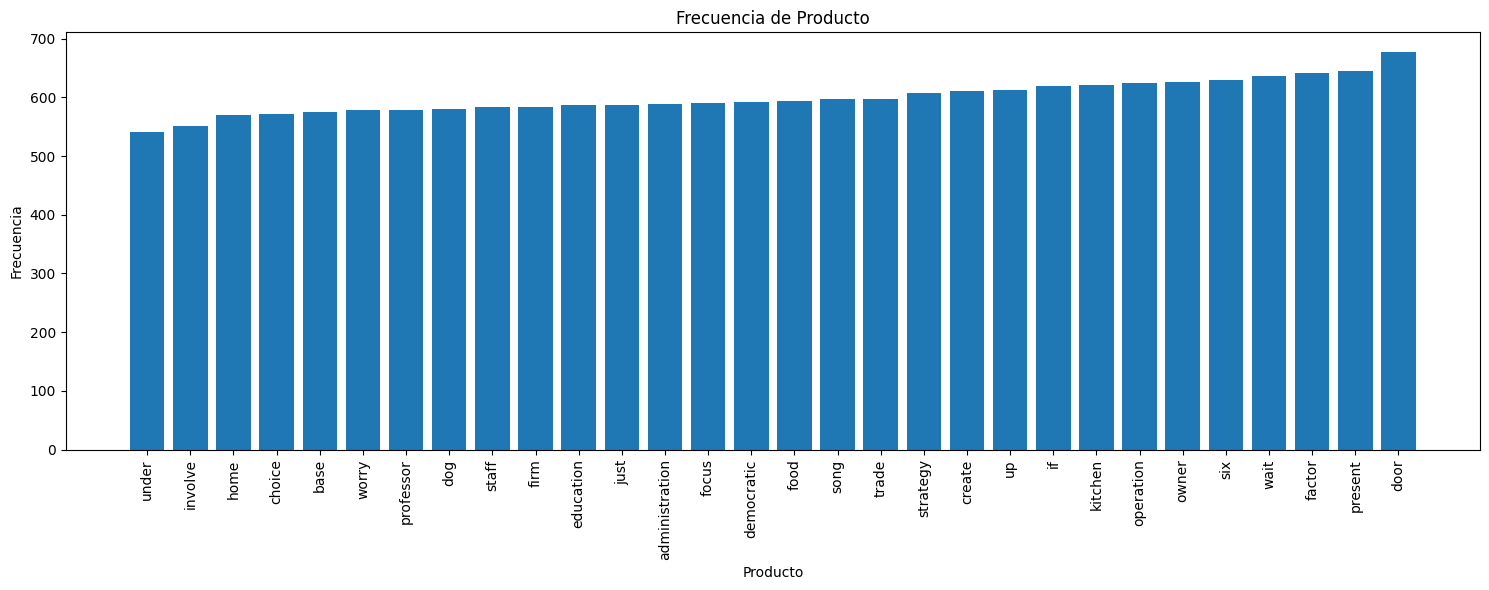

In [59]:
conteo = df['Producto'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Producto')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección de Ciudad

In [63]:
def add_space_before_mayus(cadena):
    cadena = re.sub(r'([a-z])([A-Z])',r'\1 \2', cadena)
    return cadena 

In [64]:
df['Ciudad'] = df['Ciudad'].apply(clean_string)
df['Ciudad'] = df['Ciudad'].apply(add_space_before_mayus)
df['CiudadValidation'] = df['Ciudad'].apply(validate_string)

df[['Ciudad', 'CiudadValidation']].groupby('CiudadValidation').count()

,Ciudad
CiudadValidation,
True,18000


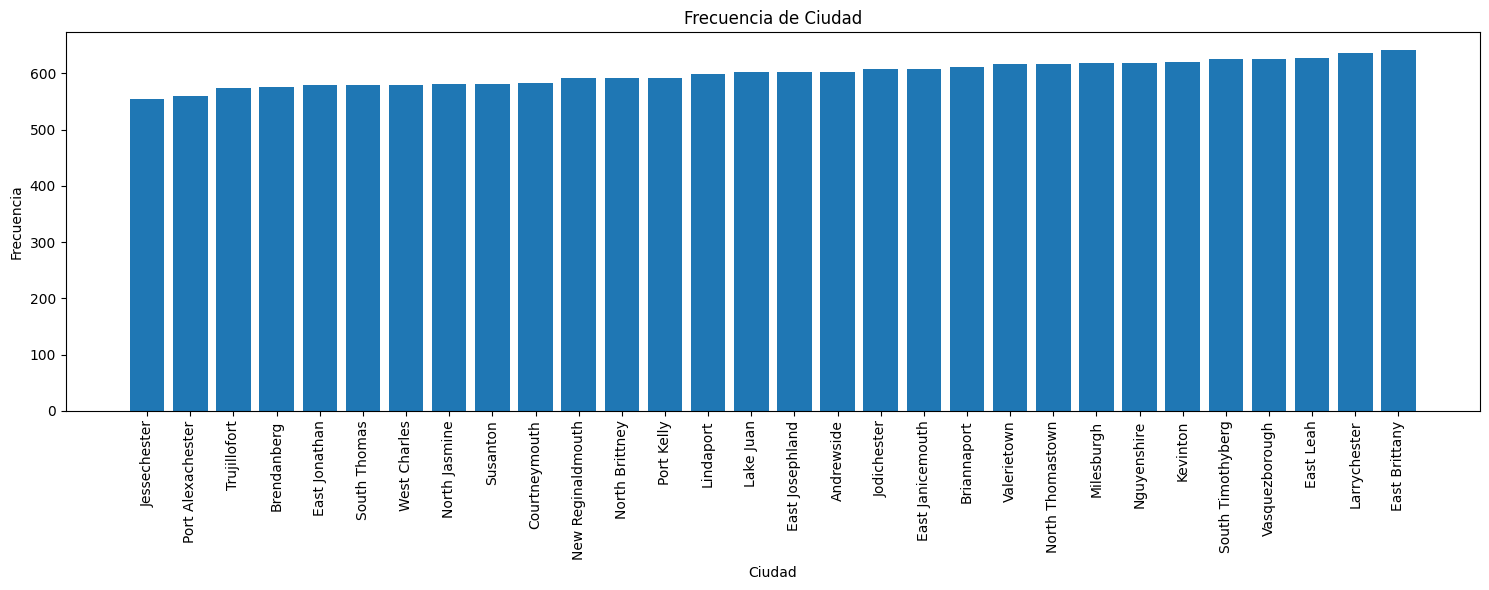

In [65]:
conteo = df['Ciudad'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Ciudad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección de Categoría

In [67]:
df['Categoria'] = df['Categoria'].apply(clean_string)
df['Categoria'] = df['Categoria'].apply(add_space_before_mayus)
df['CategoriaValidation'] = df['Categoria'].apply(validate_string)

df[['Categoria', 'CategoriaValidation']].groupby('CategoriaValidation').count()

,Categoria
CategoriaValidation,
True,18000


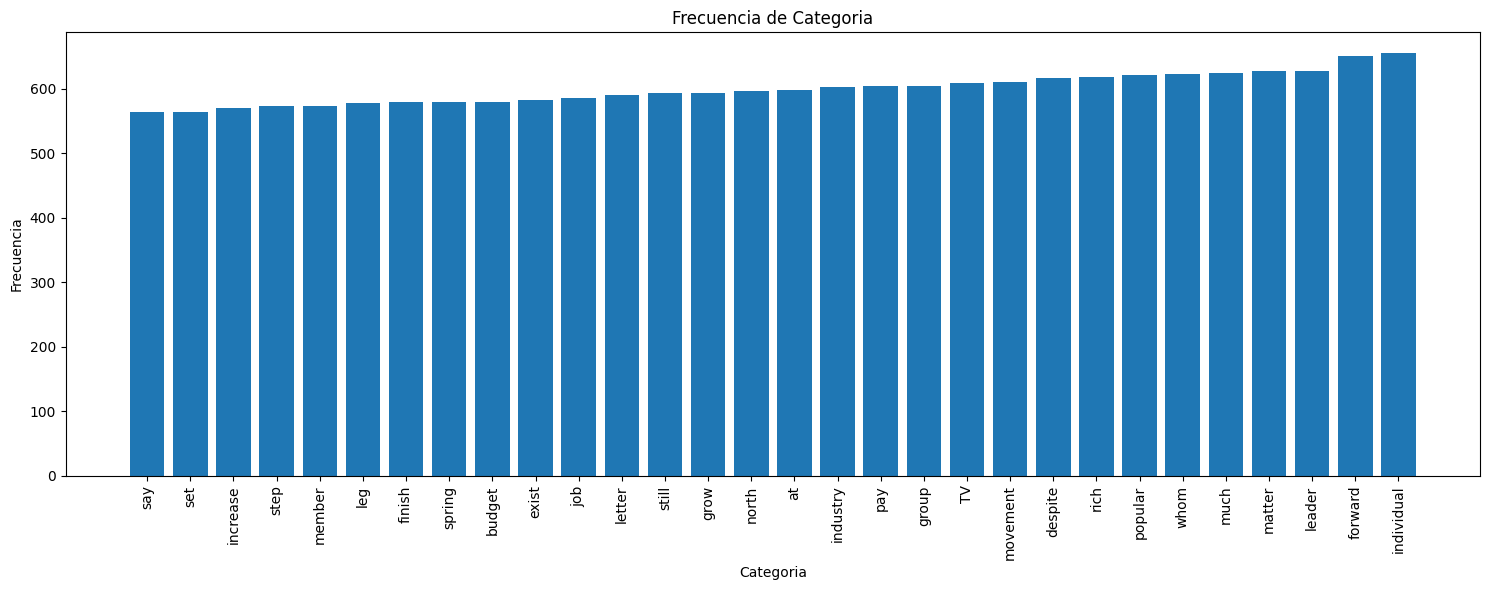

In [68]:
conteo = df['Categoria'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Categoria')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [69]:
df.columns

Index(['ID_Venta', 'Producto', 'Ciudad', 'Categoria', 'Precio_Unitario',
       'Cantidad', 'Fecha_Venta', 'Cliente', 'Email', 'Telefono', 'Direccion',
       'Metodo_Pago', 'Estado', 'Comentario', 'Descuento', 'EmailValidation',
       'ProductoValidation', 'CiudadValidation', 'CategoriaValidation'],
      dtype='object')

In [70]:
df.dtypes

ID_Venta                int64
Producto               object
Ciudad                 object
Categoria              object
Precio_Unitario         int64
Cantidad                int64
Fecha_Venta            object
Cliente                object
Email                  object
Telefono               object
Direccion              object
Metodo_Pago            object
Estado                 object
Comentario             object
Descuento               int64
EmailValidation          bool
ProductoValidation       bool
CiudadValidation         bool
CategoriaValidation      bool
dtype: object

# Corrección Fecha venta

In [71]:
def is_date(cadena):
    formats = ["%Y-%m-%d", "%d-%m-%Y", "%m/%d/%Y", "%d/%m/%Y"]
    for format in formats:
        try:
            datetime.strptime(cadena, format)
            return True
        except ValueError:
            continue
    return False

In [72]:
def clean_string_date(cadena):
    cadena = re.sub(r'^[^a-zA-Z0-9\s]+', '', cadena)
    cadena = re.sub(r'[^a-zA-Z0-9\s]+$', '', cadena)
    cadena = re.sub(r'\s+', ' ', cadena)
    cadena = cadena.strip()
    return cadena

In [74]:
df['Fecha_Venta'] = df['Fecha_Venta'].apply(clean_string_date)
df['Fecha_VentaValidation'] = df['Fecha_Venta'].apply(is_date)

df[['Fecha_Venta', 'Fecha_VentaValidation']].groupby('Fecha_VentaValidation').count()

,Fecha_Venta
Fecha_VentaValidation,
True,18000


In [75]:
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'])
print('Todas las fechas están corregidas')

Todas las fechas están corregidas


# Corrección de Cliente

In [76]:
df['Cliente'] = df['Cliente'].apply(clean_string)
df['Cliente'] = df['Cliente'].apply(add_space_before_mayus)
df['ClienteValidation'] = df['Categoria'].apply(validate_string)

df[['Cliente', 'ClienteValidation']].groupby('ClienteValidation').count()

,Cliente
ClienteValidation,
True,18000


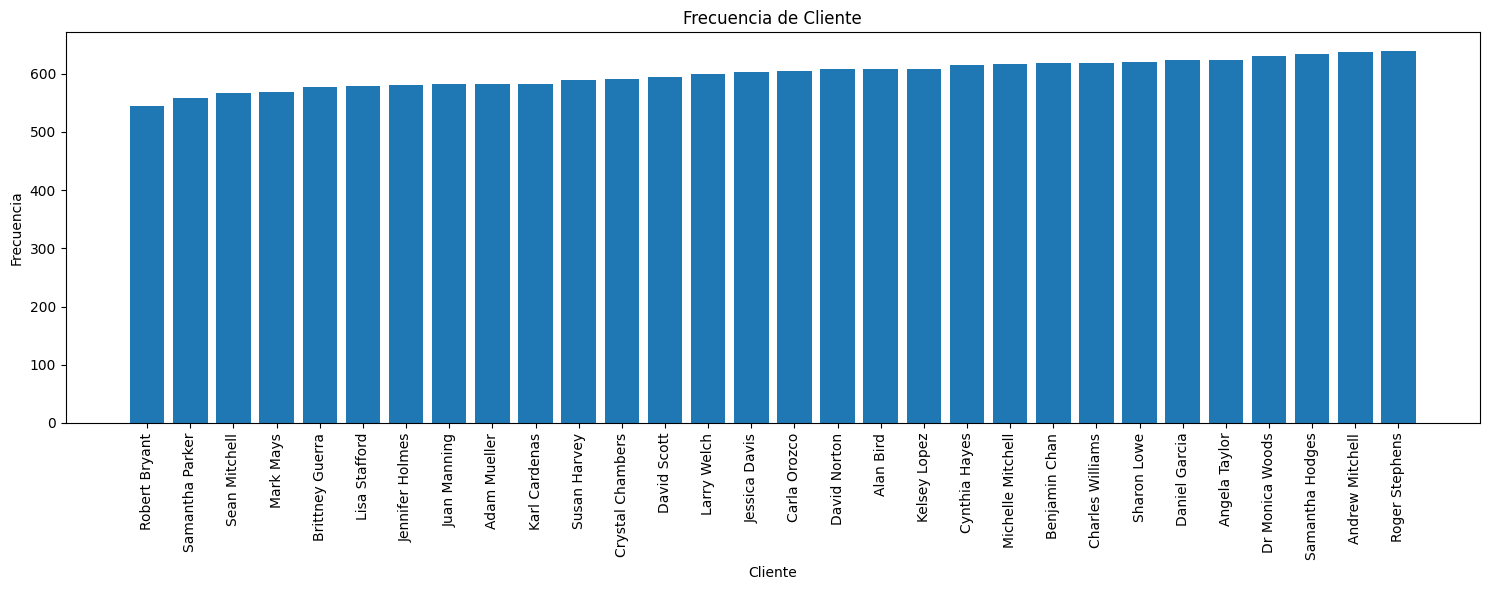

In [77]:
conteo = df['Cliente'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Cliente')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cliente')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correción del teléfono

In [79]:
df['Telefono'] = df['Telefono'].apply(clean_string_date)

In [80]:
df['TelefonoRegex']=df['Telefono'].apply(determinar_patron)
df['TelefonoRegex'].unique().tolist()

['\\d\\-\\d\\-\\d\\-\\d[a-zA-Z]\\d',
 '\\d\\)\\d\\-\\d',
 '\\d\\-\\d\\-\\d',
 '\\d\\.\\d\\.\\d',
 '\\d\\-\\d\\-\\d[a-zA-Z]\\d',
 '\\d\\-\\d\\-\\d\\-\\d',
 '\\d',
 '\\d\\)\\d\\-\\d[a-zA-Z]\\d',
 '\\d\\.\\d\\.\\d[a-zA-Z]\\d',
 '\\(\\d\\)\\d\\-\\d[a-zA-Z]\\d',
 '\\+\\d\\-\\d\\-\\d\\-\\d[a-zA-Z]\\d',
 '\\(\\d\\)\\d\\-\\d']

In [82]:
for reg in df['TelefonoRegex'].unique().tolist():
    example = df['Telefono'][df['TelefonoRegex']==reg].iloc[0]
    print(f"{reg} ======================= {example}")

\d\-\d\-\d\-\d[a-zA-Z]\d ======================= 001-419-330-3873x87349
\d\)\d\-\d ======================= 175)317-5834
\d\-\d\-\d ======================= 857-262-8794
\d\.\d\.\d ======================= 280.504.6212
\d\-\d\-\d[a-zA-Z]\d ======================= 870-860-8083x698
\d\-\d\-\d\-\d ======================= 001-338-955-6200
\d ======================= 2661673098
\d\)\d\-\d[a-zA-Z]\d ======================= 612)821-1834x900
\d\.\d\.\d[a-zA-Z]\d ======================= 602.238.8997x526
\(\d\)\d\-\d[a-zA-Z]\d ======================= (314)325-7035x737
\+\d\-\d\-\d\-\d[a-zA-Z]\d ======================= +1-105-592-6193x7727
\(\d\)\d\-\d ======================= (175)317-5834


In [83]:
def clean_phone_number(phone_number):
    if 'x' in phone_number:
        phone_number = phone_number.split('x')[0]
    if '.' in phone_number:
        phone_number = phone_number.replace('.', '-')
    return phone_number

In [84]:
df['Telefono'] = df['Telefono'].apply(clean_phone_number)

In [85]:
df['TelefonoRegex']=df['Telefono'].apply(determinar_patron)
df['TelefonoRegex'].unique().tolist()

['\\d\\-\\d\\-\\d\\-\\d',
 '\\d\\)\\d\\-\\d',
 '\\d\\-\\d\\-\\d',
 '\\d',
 '\\(\\d\\)\\d\\-\\d',
 '\\+\\d\\-\\d\\-\\d\\-\\d']

In [86]:
for reg in df['TelefonoRegex'].unique().tolist():
    example = df['Telefono'][df['TelefonoRegex']==reg].iloc[0]
    print(f"{reg} ======================= {example}")

\d\-\d\-\d\-\d ======================= 001-419-330-3873
\d\)\d\-\d ======================= 175)317-5834
\d\-\d\-\d ======================= 857-262-8794
\d ======================= 2661673098
\(\d\)\d\-\d ======================= (314)325-7035
\+\d\-\d\-\d\-\d ======================= +1-105-592-6193


In [87]:
def standarize_phone(phone_number):
    phone_number = re.sub(r'^\+1[-\s]?', '', phone_number)
    phone_number = re.sub(r'[^\d]', '', phone_number)
    
    if len(phone_number) == 10:
        phone_number = f"{phone_number[:3]}-{phone_number[3:6]}-{phone_number[6:]}"
    return phone_number

In [88]:
df['Telefono'] = df['Telefono'].apply(standarize_phone)
df['TelefonoRegex']=df['Telefono'].apply(determinar_patron)
df['TelefonoRegex'].unique().tolist()

['\\d', '\\d\\-\\d\\-\\d']

In [92]:
for reg in df['TelefonoRegex'].unique().tolist():
    example = df['Telefono'][df['TelefonoRegex']==reg].iloc[0]
    print(f"'{reg}'                     '{example}'")

'\d\-\d\-\d'                     '419-330-3873'
'\d'                     '11055926193'


In [93]:
def delete_001(phone_number):
    if phone_number.startswith('001'):
        phone_number = phone_number[3:]
        
    if len(phone_number) == 10:
        phone_number = f"{phone_number[:3]}-{phone_number[3:6]}-{phone_number[6:]}"
        
    if len(phone_number) == 11:
        phone_number = f"{phone_number[1:4]}-{phone_number[4:7]}-{phone_number[7:]}"
        
    return phone_number



In [94]:
df['Telefono'] = df['Telefono'].apply(delete_001)
df['TelefonoRegex']=df['Telefono'].apply(determinar_patron)
df['TelefonoRegex'].unique().tolist()

['\\d\\-\\d\\-\\d']

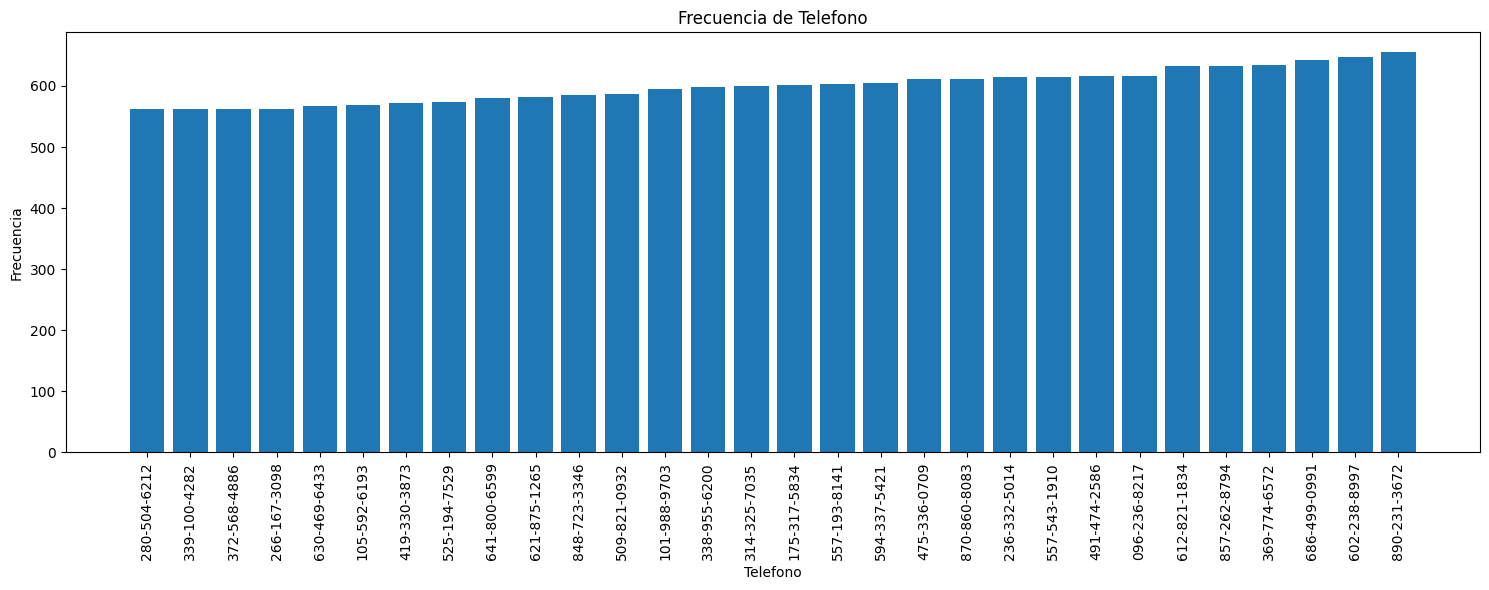

In [95]:
conteo = df['Telefono'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Telefono')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Telefono')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección de Dirección

In [99]:
def add_space_between_num_and_str(cadena):
    cadena = re.sub(r'([a-zA-Z])(\d)', r'\1 \2', cadena)
    cadena = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', cadena)
    return cadena

In [102]:
def replace_apoap(cadena):
    if 'APOAP' in cadena:
        cadena = cadena.replace('APOAP', 'APO AP')
    return cadena

In [103]:
df['Direccion'] = df['Direccion'].apply(clean_string)
df['Direccion'] = df['Direccion'].apply(add_space_before_mayus)
df['Direccion'] = df['Direccion'].apply(add_space_between_num_and_str)
df['Direccion'] = df['Direccion'].apply(replace_apoap)

df['DireccionValidation'] = df['Direccion'].apply(validate_string)

df[['Direccion', 'DireccionValidation']].groupby('DireccionValidation').count()

,Direccion
DireccionValidation,
True,18000


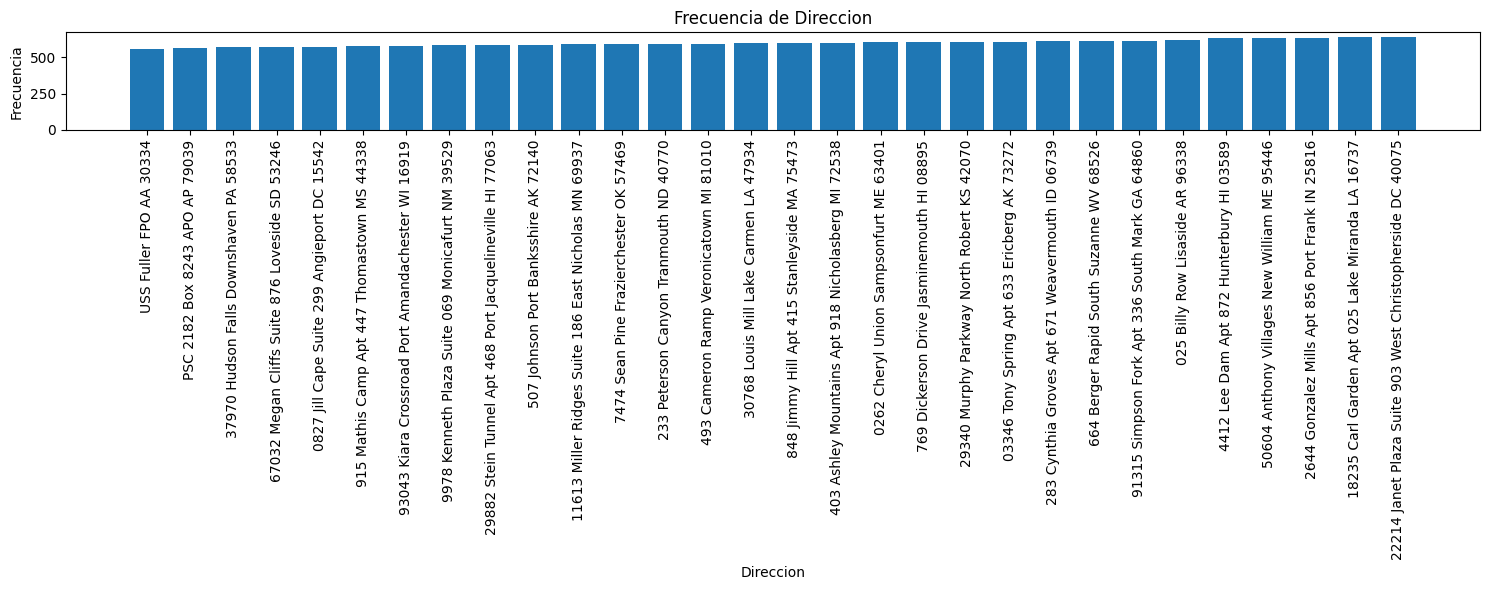

In [104]:
conteo = df['Direccion'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Direccion')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Direccion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección método de pago

In [105]:
df['Metodo_Pago'] = df['Metodo_Pago'].apply(clean_string)
df['Metodo_Pago'] = df['Metodo_Pago'].apply(add_space_before_mayus)
df['Metodo_PagoValidation'] = df['Metodo_Pago'].apply(validate_string)

df[['Metodo_Pago', 'Metodo_PagoValidation']].groupby('Metodo_PagoValidation').count()

,Metodo_Pago
Metodo_PagoValidation,
True,18000


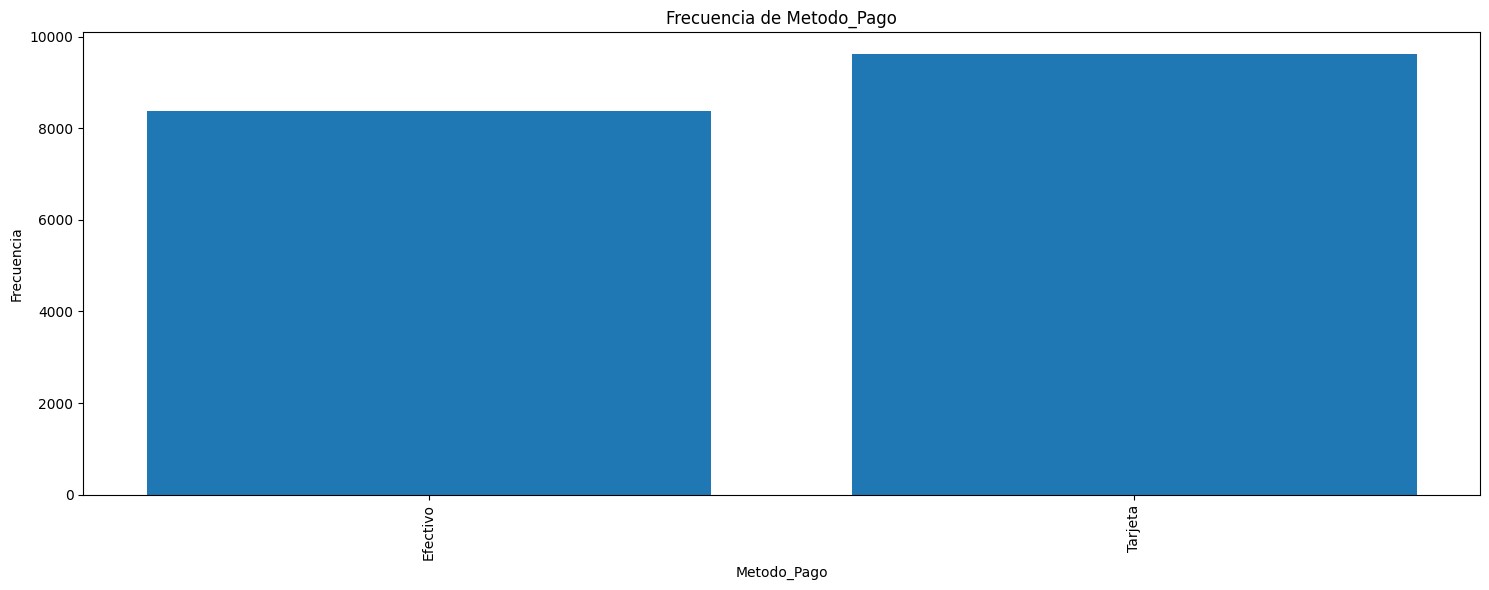

In [106]:
conteo = df['Metodo_Pago'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Metodo_Pago')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Metodo_Pago')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Corrección de Estado

In [113]:
def replace_encamino(cadena):
    if 'Encamino' in cadena:
        cadena = cadena.replace('Encamino', 'En camino')
    return cadena

In [114]:
df['Estado'] = df['Estado'].apply(clean_string)
df['Estado'] = df['Estado'].apply(add_space_before_mayus)
df['Estado'] = df['Estado'].apply(replace_encamino)
df['EstadoValidation'] = df['Estado'].apply(validate_string)

df[['Estado', 'EstadoValidation']].groupby('EstadoValidation').count()

,Estado
EstadoValidation,
True,18000


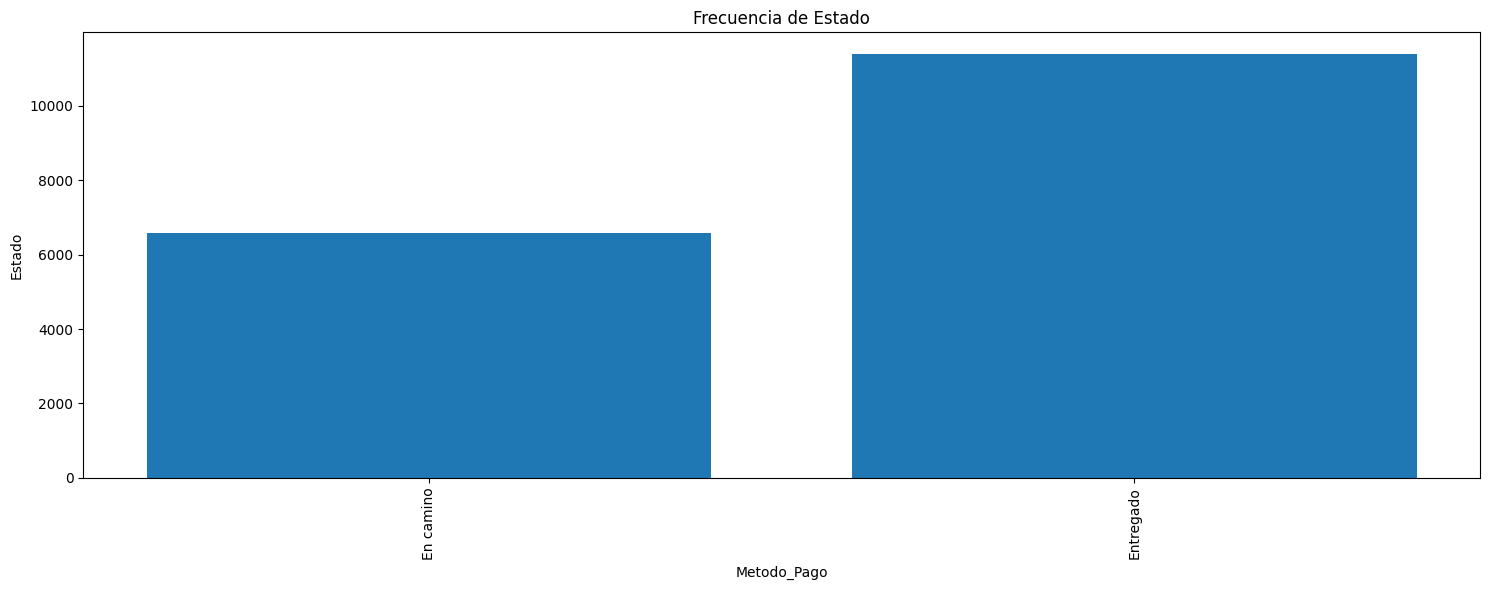

In [115]:
conteo = df['Estado'].value_counts()

conteo_ordendado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordendado.index, conteo_ordendado.values)
plt.xlabel('Metodo_Pago')
plt.ylabel('Estado')
plt.title('Frecuencia de Estado')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Correción de comentario

In [117]:
df['Comentario'].fillna('', inplace=True)
df['Comentario'] = df['Comentario'].apply(clean_string)

C:\Users\andre\AppData\Local\Temp\ipykernel_23980\2417170555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comentario'].fillna('', inplace=True)


In [120]:
df['Comentario'] = df['Comentario'].apply(lambda x: 'Producto defectuoso' if x == 'Productodefectuoso' else x)
df['Comentario'] = df['Comentario'].apply(lambda x: 'Sin comentario' if x == '' else x)

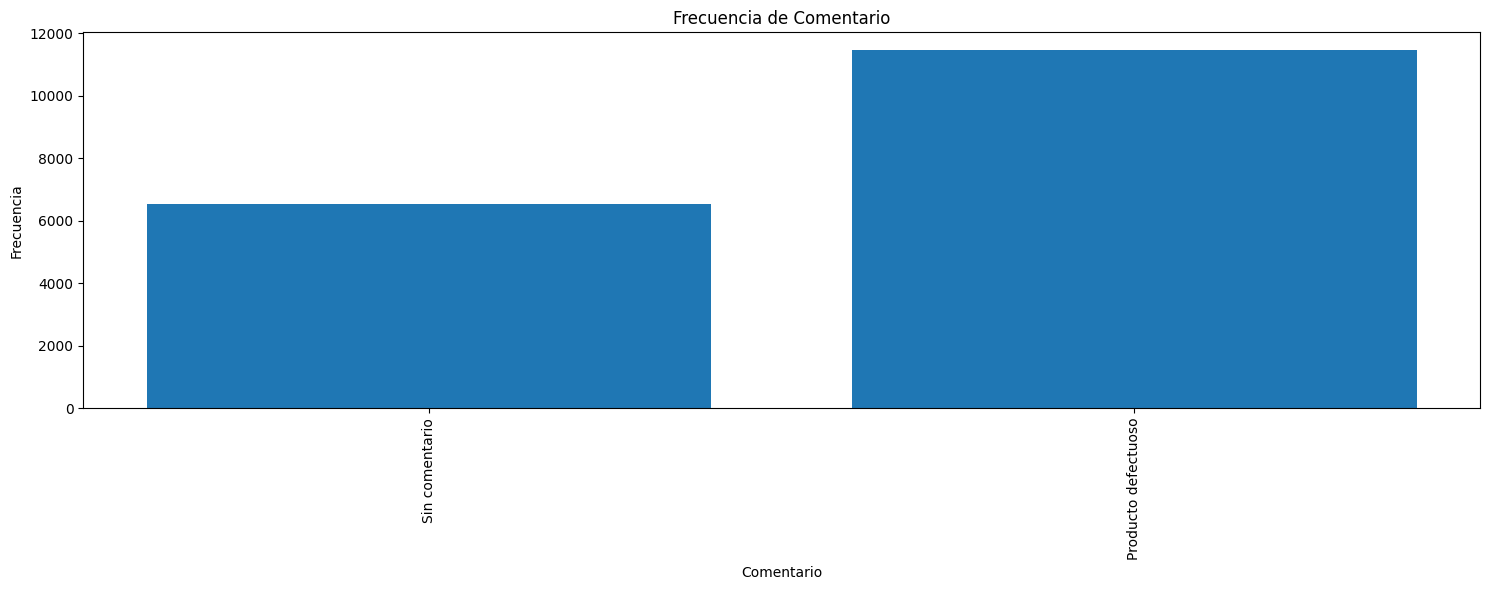

In [121]:
conteo = df['Comentario'].value_counts()

conteo_ordenado = conteo.sort_values(ascending=True)

plt.figure(figsize=(15, 6))
plt.bar(conteo_ordenado.index, conteo_ordenado.values)
plt.xlabel('Comentario')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Comentario')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Eliminar columnas de validación

In [122]:
df.columns

Index(['ID_Venta', 'Producto', 'Ciudad', 'Categoria', 'Precio_Unitario',
       'Cantidad', 'Fecha_Venta', 'Cliente', 'Email', 'Telefono', 'Direccion',
       'Metodo_Pago', 'Estado', 'Comentario', 'Descuento', 'EmailValidation',
       'ProductoValidation', 'CiudadValidation', 'CategoriaValidation',
       'Fecha_VentaValidation', 'ClienteValidation', 'TelefonoRegex',
       'DireccionValidation', 'Metodo_PagoValidation', 'EstadoValidation'],
      dtype='object')

In [123]:
df = df.drop(columns=['EmailValidation',
       'ProductoValidation', 'CiudadValidation', 'CategoriaValidation',
       'Fecha_VentaValidation', 'ClienteValidation', 'TelefonoRegex',
       'DireccionValidation', 'Metodo_PagoValidation', 'EstadoValidation'])

df.head()

,ID_Venta,Producto,Ciudad,Categoria,Precio_Unitario,Cantidad,Fecha_Venta,Cliente,Email,Telefono,Direccion,Metodo_Pago,Estado,Comentario,Descuento
0,28,owner,East Jonathan,TV,2400,22,2023-11-20,Daniel Garcia,edward94@example.org,419-330-3873,USS Fuller FPO AA 30334,Efectivo,Entregado,Producto defectuoso,21
1,20,education,Trujillofort,spring,600,18,2023-01-04,Larry Welch,powersjimmy@example.org,175-317-5834,03346 Tony Spring Apt 633 Ericberg AK 73272,Efectivo,Entregado,Producto defectuoso,87
2,25,strategy,Nguyenshire,group,900,28,2023-05-05,Kelsey Lopez,estesjon@example.org,857-262-8794,493 Cameron Ramp Veronicatown MI 81010,Efectivo,En camino,Producto defectuoso,12
3,9,present,South Thomas,budget,700,27,2023-06-28,Sharon Lowe,estesjon@example.org,594-337-5421,29882 Stein Tunnel Apt 468 Port Jacquelinevill...,Efectivo,Entregado,Producto defectuoso,28
4,9,song,New Reginaldmouth,at,200,29,2023-07-08,Alan Bird,edward94@example.org,236-332-5014,30768 Louis Mill Lake Carmen LA 47934,Tarjeta,Entregado,Producto defectuoso,14


In [124]:
df.shape

(18000, 15)

# Pasar el Dataframe a CSV

In [125]:
df.to_csv(os.path.join(data_folder, 'datos_ventas_clean.csv'), index=False)
print('Archivo guardado correctamente. Limpieza de datos finalizada')

Archivo guardado correctamente. Limpieza de datos finalizada
